# Heart Attack Analysis and Prediction - Clone Project(Kaggle, Heart Attack Prediction_95.4% accuracy)

---
## Heart Attack Prediction
---
**Aurthor: Avinash Bagul**

*MSc Artificial Intelligence (University of Aberdeen)*

In [4]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 243 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 8.5 MB/s  eta 0:00:01
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
     |████████████████████████████████| 4.3 MB 17.5 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=d593243d1a95412ada32ed0c11e8a667f9b0c8e958dd58c6c649472b57d29a83
  Stored in directory: /Users/swsong/Library/Caches/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as profile

In [6]:
df = pd.read_csv('./data/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


AxesSubplot(0.125,0.125;0.775x0.755)


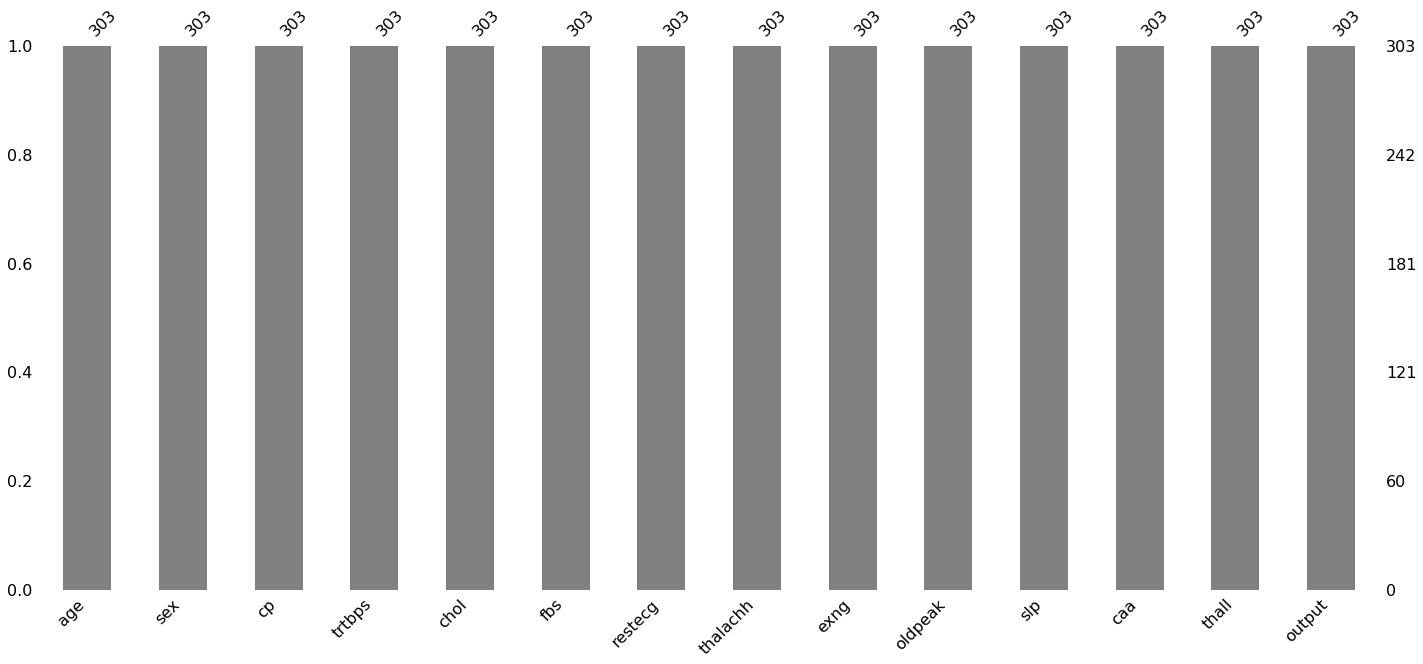

In [9]:
import missingno as msno
n = msno.bar(df, color='gray')
print(n)

In [10]:
profile.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

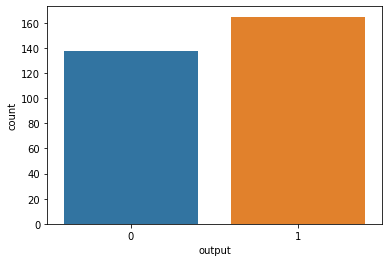

In [11]:
sns.countplot(x='output', data=df)
plt.show()

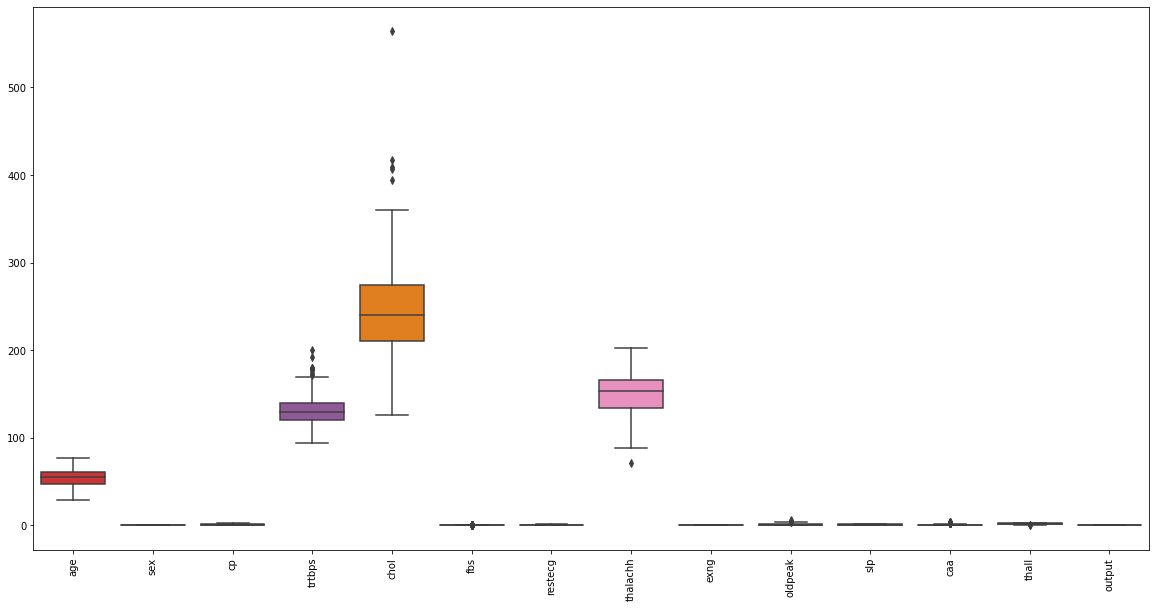

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [15]:
def removeOutlier(att, df):
    lowerbound = att.mean() -3 * att.std()
    upperbound = att.mean() +3 * att.std()
    
    print('lowerbound: ',lowerbound, ' --------- upperbound:',upperbound)
    
    df1 = df[(att > lowerbound) & (att < upperbound)]
    
    print((df.shape[0] - df1.shape[0]), 'number of outliers from ', df.shape[0])
    print('****************************************************')
    
    df = df1.copy()
    return df

In [16]:
df = removeOutlier(df.trtbps, df)

lowerbound:  79.00933393568633  --------- upperbound: 184.23819081678894
2 number of outliers from  303
****************************************************


In [17]:
df = removeOutlier(df.chol, df)

lowerbound:  90.29311096799375  --------- upperbound: 401.71353355027867
4 number of outliers from  301
****************************************************


In [18]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


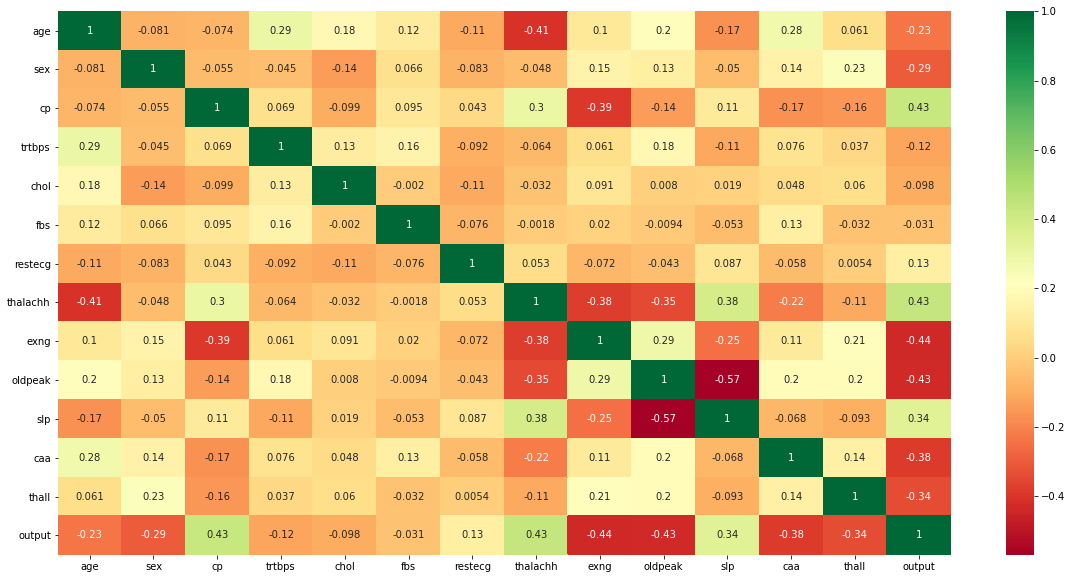

In [28]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [19]:
corrmat = df.corr()

In [20]:
corrmat.index

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [26]:
corrmat.index == df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

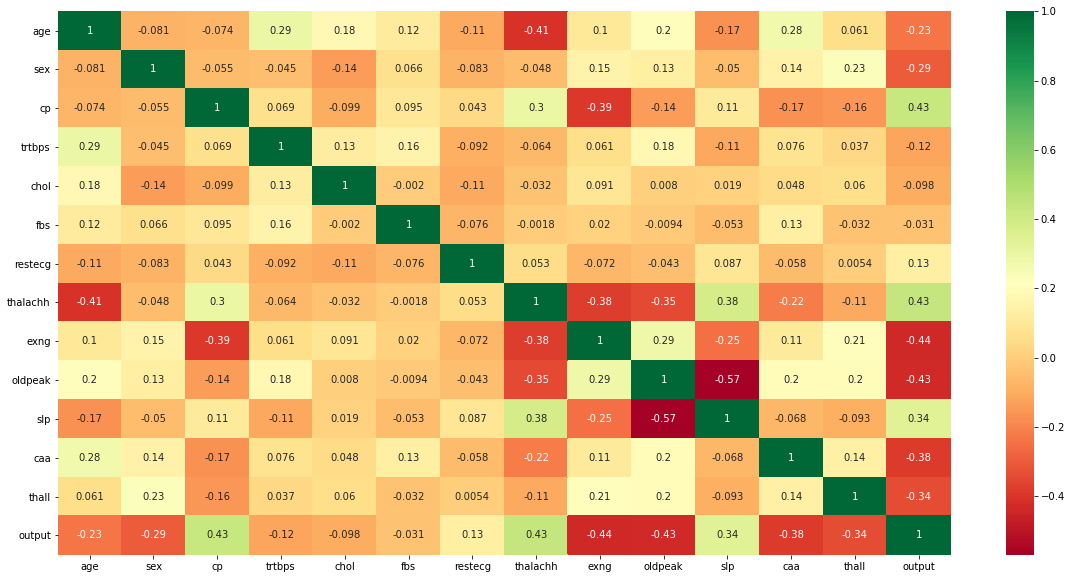

In [30]:
plt.figure(figsize=(20,10))
g = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [33]:
#...Isn't It same?? I don't Know why the analyst wrote code like this

In [32]:
df.output.value_counts()

1    163
0    134
Name: output, dtype: int64

In [34]:
from sklearn.utils import resample

# Seperate Targer Classes
df_1 = df[df.output==1]
df_2 = df[df.output==0]

# Upsample minority class
df_upsample_1 = resample(df_2,
                         replace=True, #sample with replacement
                         n_samples=163, #to match majority class
                         random_state=123, #reproducible results
                        )

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_upsample_1])

# Display new class counts
df_upsampled.output.value_counts()

1    163
0    163
Name: output, dtype: int64

In [35]:
x = df_upsampled.drop('output', axis=1)
y = df_upsampled['output']

In [36]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y,test_size=0.2,random_state=111)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test, y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n', classification_report(y_test, y_pred))
    
    # Area Under The Curve Score:
    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 = lb.transform(y_pred)
    print('AUC_ROC Score: ', roc_auc_score(y_test1, y_pred1, average='macro'),'\n\n')
    
    print('Confusion Matrix: \n\n')
    plt.style.use('ggplot')
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm, figsize=(8,6), show_normed=True)
    
    

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
pred_rf = rf_classifier.predict(x_test)

Accuracy is:  0.9696969696969697

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.95      0.97        39

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66

AUC_ROC Score:  0.9743589743589743 


Confusion Matrix: 




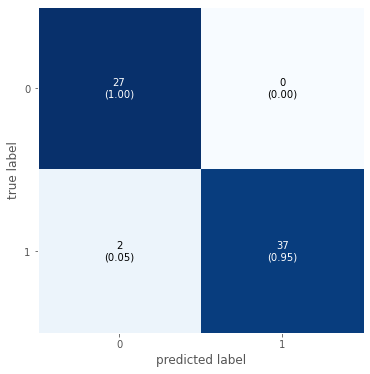

In [43]:
evaluator(y_test, pred_rf)

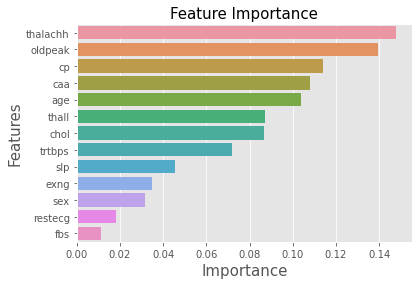

In [47]:
important_features = pd.DataFrame({'Features': x.columns,
                                   'Importance': rf_classifier.feature_importances_
                                  })

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance',ascending=False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y='Features', data=important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)

# display the plot
plt.show()

In [49]:
rf_classifier.feature_importances_

array([0.10397269, 0.03160481, 0.11390469, 0.07181901, 0.08679668,
       0.01125731, 0.01812687, 0.14768856, 0.03499644, 0.13942371,
       0.04532176, 0.10802872, 0.08705876])

In [48]:
important_features

,Features,Importance
7,thalachh,0.147689
9,oldpeak,0.139424
2,cp,0.113905
11,caa,0.108029
0,age,0.103973
12,thall,0.087059
4,chol,0.086797
3,trtbps,0.071819
10,slp,0.045322
8,exng,0.034996


-----------------
Study Point:

1. Outlier remove function

In [ ]:
def removeOutlier(att, df):
    lowerbound = att.mean() -3 * att.std()
    upperbound = att.mean() +3 * att.std()
    
    print('lowerbound: ',lowerbound, ' --------- upperbound:',upperbound)
    
    df1 = df[(att > lowerbound) & (att < upperbound)]
    
    print((df.shape[0] - df1.shape[0]), 'number of outliers from ', df.shape[0])
    print('****************************************************')
    
    df = df1.copy()
    return df

2. Upsampling code

In [ ]:
from sklearn.utils import resample

# Seperate Targer Classes
df_1 = df[df.output==1]
df_2 = df[df.output==0]

# Upsample minority class
df_upsample_1 = resample(df_2,
                         replace=True, #sample with replacement
                         n_samples=163, #to match majority class
                         random_state=123, #reproducible results
                        )

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_upsample_1])

# Display new class counts
df_upsampled.output.value_counts()